# PROJET TECHNO DATA

## Auteurs

Adrien Chaptal

Gael Rousseau

## Declaration librairies

In [174]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## I - Analyse et Preparation des données

1. Etudier les données en affichants les informations correspondantes (colonnes, indice, etc) :

In [175]:
## TO DO
df_caracteristique = pd.read_csv('./bdd/caracteristiques-2017.csv', encoding ='latin1')
print(df_caracteristique.shape)

(60701, 16)


In [176]:
df_lieux = pd.read_csv('./bdd/lieux-2017.csv', encoding ='latin1')

print(df_lieux.shape)

(60701, 18)


In [177]:
df_usagers = pd.read_csv('./bdd/usagers-2017.csv', encoding ='latin1')

print(df_usagers.shape)

(136021, 12)


In [178]:
df_vehicules = pd.read_csv('./bdd/vehicules-2017.csv', encoding ='latin1')

print(df_vehicules.shape)

(103546, 9)


2. Fusionner les fichiers de donnés 

In [179]:
frames = [df_caracteristique, df_lieux, df_usagers, df_vehicules]
df_total = pd.concat(frames, axis=1)

print(df_total.shape)

(136021, 55)


3. Nettoyer la base de données

Ex : Identifier le pourcentage de valeurs NaN dans la base et éliminez les colonnes où la majorité
des valeurs sont NaN.

In [180]:

df = df_total.loc[:, df_total.isnull().mean() < .5]

#Also we remove the colums in named "num_veh" et Num_Acc because we will not need it and it's not numerical values   
df = df.loc[:,~df.columns.duplicated()]
df.drop(['num_veh'], axis=1, inplace=True)
df.drop(['Num_Acc'], axis=1, inplace=True)

df

,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,senc,catv,occutc,obs,obsm,choc,manv
0,1.0,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,0.0,7.0,0.0,0.0,2.0,3.0,9.0
1,2.0,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,0.0,10.0,0.0,0.0,2.0,3.0,13.0
2,1.0,1,3,1,1.0,13.0,0.0,0.0,0.0,1967.0,0.0,7.0,0.0,0.0,0.0,1.0,16.0
3,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1953.0,0.0,1.0,0.0,0.0,0.0,7.0,1.0
4,1.0,1,3,1,5.0,22.0,0.0,0.0,0.0,1960.0,0.0,10.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136016,1.0,1,1,2,9.0,11.0,0.0,0.0,0.0,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136017,1.0,1,1,2,9.0,11.0,0.0,0.0,0.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136018,1.0,1,4,1,9.0,21.0,0.0,0.0,0.0,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136019,2.0,2,4,2,9.0,21.0,0.0,0.0,0.0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Supprimer les variables dont la majorité des observations sont manquantes

In [181]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    shape=df.shape[0]
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    pct=count/df.shape[0]
    if(isinstance(pct, pd.Series)):
        print("Can't process Series...")
    elif(pct > 0.5):
        df.drop([column_name], axis=1, inplace=True)
        print("Removing column ", column_name)
    
df

Removing column  locp
Removing column  actp
Removing column  etatp
Removing column  occutc
Removing column  obs


,place,catu,grav,sexe,trajet,secu,an_nais,senc,catv,obsm,choc,manv
0,1.0,1,3,1,9.0,13.0,1968.0,0.0,7.0,2.0,3.0,9.0
1,2.0,2,3,2,9.0,11.0,1973.0,0.0,10.0,2.0,3.0,13.0
2,1.0,1,3,1,1.0,13.0,1967.0,0.0,7.0,0.0,1.0,16.0
3,1.0,1,1,1,0.0,11.0,1953.0,0.0,1.0,0.0,7.0,1.0
4,1.0,1,3,1,5.0,22.0,1960.0,0.0,10.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136016,1.0,1,1,2,9.0,11.0,1974.0,NaN,NaN,NaN,NaN,NaN
136017,1.0,1,1,2,9.0,11.0,1987.0,NaN,NaN,NaN,NaN,NaN
136018,1.0,1,4,1,9.0,21.0,1991.0,NaN,NaN,NaN,NaN,NaN
136019,2.0,2,4,2,9.0,21.0,1990.0,NaN,NaN,NaN,NaN,NaN


5. Remplir les valeurs NaN par différentes méthodes

In [207]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    if (col_name == "trajet"):
        df[col_name] = df[col_name].fillna(value=9)
    elif (col_name == "place"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    elif (col_name == "an_nais"):
        df[col_name] = df[col_name].fillna(float(df[col_name].median()))
    elif (col_name == "catv"):
        df[col_name] = df[col_name].fillna(value=99)
    elif (col_name == "obsm"):
        df[col_name] = df[col_name].fillna(value=99)
    elif (col_name == "choc"):
        df[col_name] = df[col_name].fillna(value=9)
    elif (col_name == "manv"):
        df[col_name] = df[col_name].fillna(value=25)
    elif (col_name == "senc"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    elif (col_name == "Num_Acc"):
        df[col_name] = df[col_name].fillna(method='ffill')
    elif (col_name == "secu"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    return df

cols_to_fill = list(df.columns)

print(df.isnull().sum(axis = 0))

print(df.isnull().sum().sum())
for x in cols_to_fill:
    df = fill_nas_by_type(df, x)
print(df.isnull().sum().sum())
print(df.isnull().sum(axis = 0))

place        0
catu         0
grav         0
sexe         0
trajet       0
secu         0
an_nais      0
senc         0
catv         0
obsm         0
choc         0
manv         0
mortalite    0
dtype: int64
0
0
place        0
catu         0
grav         0
sexe         0
trajet       0
secu         0
an_nais      0
senc         0
catv         0
obsm         0
choc         0
manv         0
mortalite    0
dtype: int64


6. Analyser les données par les statistiques (min, max, médiane)

In [208]:
## TO DO

for col_name in df.columns:
    
    if(col_name != "Num_Acc"):
        print("Column: " + col_name)

        print(df[col_name].describe())
        print("\n \n")

Column: place
count    136021.000000
mean          1.393300
std           1.233188
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: place, dtype: float64

 

Column: catu
count    136021.000000
mean          1.349814
std           0.639996
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: catu, dtype: float64

 

Column: grav
count    136021.000000
mean          2.492858
std           1.330687
min           1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: grav, dtype: float64

 

Column: sexe
count    136021.000000
mean          1.323016
std           0.467631
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: sexe, dtype: float64

 

Column: trajet
count    136021.000000
mean          3.476713
std           2.647390
mi

7. Expliquer la gravité des accidents en fonction des autres variables (créer une nouvelle variable "mortalité" qui indique si la victime est décédée ou non suite à l'accident : tué=1 non=0)

In [209]:
tue = df.grav == 2

df['mortalite'] = np.where(tue, 1, np.where(np.logical_not(tue), 0, np.NaN))
df

,place,catu,grav,sexe,trajet,secu,an_nais,senc,catv,obsm,choc,manv,mortalite
0,1.0,1,3,1,9.0,13.0,1968.0,0.0,7.0,2.0,3.0,9.0,0.0
1,2.0,2,3,2,9.0,11.0,1973.0,0.0,10.0,2.0,3.0,13.0,0.0
2,1.0,1,3,1,1.0,13.0,1967.0,0.0,7.0,0.0,1.0,16.0,0.0
3,1.0,1,1,1,0.0,11.0,1953.0,0.0,1.0,0.0,7.0,1.0,0.0
4,1.0,1,3,1,5.0,22.0,1960.0,0.0,10.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136016,1.0,1,1,2,9.0,11.0,1974.0,1.0,99.0,99.0,9.0,25.0,0.0
136017,1.0,1,1,2,9.0,11.0,1987.0,1.0,99.0,99.0,9.0,25.0,0.0
136018,1.0,1,4,1,9.0,21.0,1991.0,1.0,99.0,99.0,9.0,25.0,0.0
136019,2.0,2,4,2,9.0,21.0,1990.0,1.0,99.0,99.0,9.0,25.0,0.0


In [210]:
df['mortalite'].value_counts(normalize=True) * 100

0.0    97.35335
1.0     2.64665
Name: mortalite, dtype: float64

## II - Visualisation et modélisation

1. Mettre en place les modèles de machine learning pour prédire et classifier la mortalité : Régression logistique, Decision Tree, Random Forest, etc

In [211]:
y = df["mortalite"]
x = df.drop('mortalite', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print ("train shape", x_train.shape, y_train.shape)
print ("test shape", x_test.shape, y_train.shape)

train shape (95214, 12) (95214,)
test shape (40807, 12) (95214,)


**Régression Logistique**

In [212]:
modele_regLog = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')
modele_regLog.fit(x_train,y_train)
precision = modele_regLog.score(x_test,y_test)
print("Precision ")
print(precision*100)


Precision 
97.36074693067366


**Decision Tree**

In [213]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))


1.0


In [214]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(x_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}


In [215]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print(metrics.accuracy_score(y_test, predictions))


1.0


**Random Forest**

In [216]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, max_depth=2)

# your code here
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
print('Precision: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Precision: 0.974 (0.000)


2. Visualiser et expliquer la distribution de la variable 'mortalité' selon les différentes variables (le genre des victimes, l'Age, etc)

**Mortalité selon le genre des victimes**

<AxesSubplot:xlabel='genre', ylabel='percentage'>

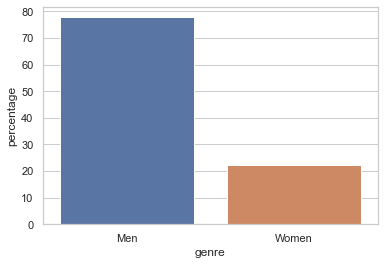

In [217]:
pct_genre = df[df['mortalite'] == 1]['sexe'].value_counts(normalize=True) * 100

sns.set_theme(style="whitegrid");
g = pd.DataFrame(columns=['percentage', 'genre'])
g['percentage'] = pct_genre
g['genre'][:1] = "Men"
g['genre'][1:2] = "Women"
sns.barplot(x="genre", y="percentage", data=g)

**Mortalité selon l'age**

         an_nais
1996.0  2.861111
1995.0  2.750000
1997.0  2.722222
1992.0  2.388889
1998.0  2.111111
...          ...
2010.0  0.111111
2009.0  0.083333
1923.0  0.055556
1921.0  0.055556
1920.0  0.027778

[98 rows x 1 columns]
        an_nais   percent
1996.0   1996.0  2.861111
1995.0   1995.0  2.750000
1997.0   1997.0  2.722222
1992.0   1992.0  2.388889
1998.0   1998.0  2.111111


<AxesSubplot:xlabel='an_nais', ylabel='percent'>

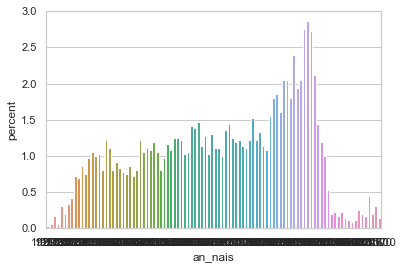

In [218]:
pct_age = df_total[df['mortalite'] == 1]['an_nais'].value_counts(normalize=True) * 100
print(pct_age.to_frame())

sns.set_theme(style="whitegrid");
a = pd.DataFrame(columns=['an_nais', 'mortalite'])
a['percent'] = pct_age
a['an_nais'] = a.index
a.reset_index()
a.drop(['mortalite'], axis=1, inplace=True)
print(a.head())
sns.barplot(x="an_nais", y="percent", data=a)

3. Normaliser les données et les appliquer aux modèles

In [219]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(x_scaled)
print(df.columns.tolist())
df_normalized.columns = df.columns.tolist()
df_normalized


['place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'an_nais', 'senc', 'catv', 'obsm', 'choc', 'manv', 'mortalite']


,place,catu,grav,sexe,trajet,secu,an_nais,senc,catv,obsm,choc,manv,mortalite
0,0.000,0.000000,0.666667,0.0,1.000000,0.130435,0.524272,0.0,0.061224,0.020202,0.333333,0.36,0.0
1,0.125,0.333333,0.666667,1.0,1.000000,0.108696,0.572816,0.0,0.091837,0.020202,0.333333,0.52,0.0
2,0.000,0.000000,0.666667,0.0,0.111111,0.130435,0.514563,0.0,0.061224,0.000000,0.111111,0.64,0.0
3,0.000,0.000000,0.000000,0.0,0.000000,0.108696,0.378641,0.0,0.000000,0.000000,0.777778,0.04,0.0
4,0.000,0.000000,0.666667,0.0,0.555556,0.228261,0.446602,0.0,0.091837,0.020202,0.111111,0.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136016,0.000,0.000000,0.000000,1.0,1.000000,0.108696,0.582524,0.5,1.000000,1.000000,1.000000,1.00,0.0
136017,0.000,0.000000,0.000000,1.0,1.000000,0.108696,0.708738,0.5,1.000000,1.000000,1.000000,1.00,0.0
136018,0.000,0.000000,1.000000,0.0,1.000000,0.217391,0.747573,0.5,1.000000,1.000000,1.000000,1.00,0.0
136019,0.125,0.333333,1.000000,1.0,1.000000,0.217391,0.737864,0.5,1.000000,1.000000,1.000000,1.00,0.0


**Application des modèles sur les donéées normalisés**

In [220]:
y = df_normalized["mortalite"]
x = df_normalized.drop('mortalite', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
print ("train shape", x_train.shape, y_train.shape)
print ("test shape", x_test.shape, y_train.shape)

train shape (95214, 12) (95214,)
test shape (40807, 12) (95214,)


**Régression Logistique**

In [221]:
modele_regLog = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')
modele_regLog.fit(x_train,y_train)
y_pred = modele_regLog.predict(x_test)
precision = modele_regLog.score(x_test,y_test)
print("Precision ")
print(precision)

Precision 
0.9736074693067366


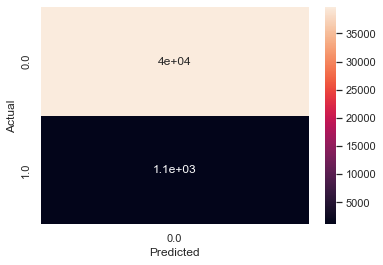

In [222]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [223]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)
mse = np.square(np.subtract(y_test,y_pred)).mean()
print(mse)

0.02639253069326341
0.02639253069326341


**Decision Tree**

In [224]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(x_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}


In [225]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

1.0


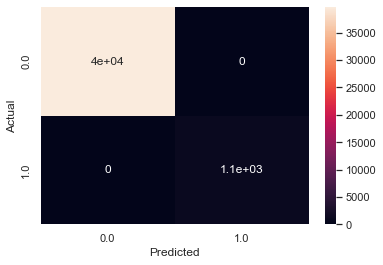

0.0
0.0


In [226]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

mae = metrics.mean_absolute_error(y_test, predictions)
print(mae)
mse = metrics.mean_squared_error(y_test, predictions)
print(mse)


**Random Forest**

In [232]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, max_depth=2)
clf.fit(x_train,y_train)
n_scores = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
print('Precision: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Precision: 0.974 (0.000)


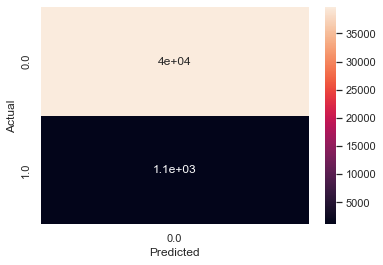

0.02639253069326341
0.02639253069326341


In [233]:
y_pred = clf.predict(x_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

4. Analyser, visualiser et expliquer le niveau de corrélation entre les variables

In [234]:
print(df_normalized.corr(method ='pearson')['mortalite'].sort_values(ascending=False))

mortalite    1.000000
secu         0.037220
catu         0.023449
trajet       0.020204
senc         0.001282
place       -0.005195
sexe        -0.035637
choc        -0.045022
manv        -0.049638
grav        -0.061069
obsm        -0.061198
catv        -0.061970
an_nais     -0.064513
Name: mortalite, dtype: float64


5. Analyser à la base du temps : Nombre d'accidents en années, Nombre d'accidents en mois, etc

<AxesSubplot:xlabel='mois', ylabel='percent'>

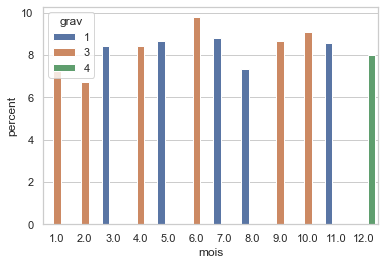

In [235]:
pct_mois = df_total['mois'].value_counts(normalize=True) * 100
mort = df_total['grav']

sns.set_theme(style="whitegrid");
d_mois = pd.DataFrame(columns=['mois', 'pct','grav'])
d_mois['percent'] = pct_mois
d_mois['mois'] = d_mois.index
d_mois['grav'] = mort
d_mois.reset_index()
d_mois.drop(['pct'], axis=1, inplace=True)
sns.barplot(x="mois", y="percent", hue="grav", data=d_mois)


6. Trouver l’heure de la journée la plus dangereuse

<AxesSubplot:xlabel='hrmn', ylabel='percent'>

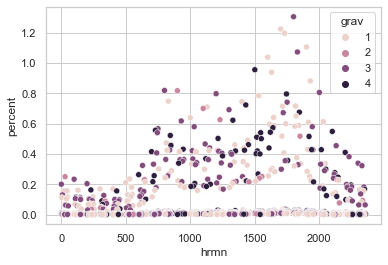

In [236]:
pct_heure = df_total['hrmn'].value_counts(normalize=True) * 100
mort = df_total['grav']

sns.set_theme(style="whitegrid");
d_heure = pd.DataFrame(columns=['heure', 'pct','grav'])
d_heure['percent'] = pct_heure
d_heure['hrmn'] = d_heure.index
d_heure['grav'] = mort
d_heure.reset_index()
d_heure.drop(['pct'], axis=1, inplace=True)
sns.scatterplot(x="hrmn", y="percent", hue="grav", data=d_heure)
